# Importing necessary libraries

In [1]:
# for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use

# Importing Data

In [89]:
df=pd.read_csv('consolidated_coin_data.csv.xls')

In [90]:
#let's look at the head of the data
df.head()

Currency          Date  Open  High   Low Close      Volume   Market Cap
0    tezos  Dec 04, 2019  1.29  1.32  1.25  1.25  46,048,752  824,588,509
1    tezos  Dec 03, 2019  1.24  1.32  1.21  1.29  41,462,224  853,213,342
2    tezos  Dec 02, 2019  1.25  1.26   1.2  1.24  27,574,097  817,872,179
3    tezos  Dec 01, 2019  1.33  1.34  1.25  1.25  24,127,567  828,296,390
4    tezos  Nov 30, 2019  1.31  1.37  1.31  1.33  28,706,667  879,181,680

In [91]:
#before we begin the visualization, it is necessary to check if the data is ready to be used for visualization or not
#let's explore if data has any null value
df.isnull().sum()

Currency      0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [92]:
#let's look for how many currrencies the data is available
df['Currency'].unique()

array(['tezos', 'binance-coin', 'eos', 'bitcoin', 'tether', 'xrp',
       'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano',
       'bitcoin-sv'], dtype=object)

We observed the date present in the data is not available in useable format. So we will transform into pure numeric form

In [3]:
#let's build a custom function
def date_extractor(date):
    #to extract year
    year=date.split(',')[1].strip()
    #to extract month name
    month_name=date.split(',')[0].split()[0].strip()
    #to extract day
    day=date.split(',')[0].split()[1].strip()
    #to output the number of the month
    months_list={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                 'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
    month=months_list[month_name]
    return year+'-'+month+'-'+day #this will return the data into correct useable format

In [93]:
#to apply the changes
df['Date']=df['Date'].apply(date_extractor)

Also notice, the values in the dataframe has values with comma between them. This will hinder the python to treat it as a pure numeric character. We need to change this into a pure numeric format

In [95]:
df__=df.drop(['Currency','Date'],axis=1)
for col in df__.columns:
    df[col]=df[col].apply(lambda x : float(x.replace(',','')))

In [145]:
df.set_index('Date',inplace=True)

Everything looks great to this point. The data is already cleaned with 0 null values and already transformed into a good format to start the visualization of the data of the 12 currencies

# Data Visualization

In this part, we will visualize the data for the two age groups. The first is `17-35 year olds` and the other is `60+ age group`. during our analysis we will develop the argument and prove our standing that the cryptocurrencies are volatile in nature and their price fluctuates too much over the course of their existence. 

## Group 1 (17-35 age)

Since the first age group is in their youth, they enjoy the interactive and colorful plots to appeal them. So, we will use the same technique here and discuss about the volatility of these cryptocurrencies in form of interactive, intuitive and colorful plots.

##### For the sake of our ease, we are going to convert the data into multi-index format since it is easier to manipulate the data from that form.

Task#1: To observe how the closing values and highest values of all the currencies have changed over years

In [100]:
df_close=df.pivot_table(values='Close',index='Date',columns='Currency')

In [172]:
df_close.iplot(title='High value for all the currencies over the period 2013-2019')

We can already see how the value of the currencies has changed over the course of years. There are some serious spikes around the year 2017&2018. The value of bitcoin rose from 1000 to around 20k in the same year. This shows the first sign of how much the nature of these currencies are volatile.

In [171]:
df_high=df.pivot_table(values='High',index='Date',columns='Currency')
df_high.iplot(title='High value for all the currencies over the period 2013-2019')

It indeed has a similar trend as the closing values.

Task#2: To visualize the percent change or returns on investment on any of these currency

In [169]:
df_close.pct_change().iplot(title='Percent Change in the values of the top currencies')

There are some sharp spikes. The tether increased about 50%, on the late of july the bitcoin-cash rose 400%, similar for tezos is oct 2017. Out of all these the bitcoin-cash had remarkable jump, let's see how much the values changed in the last 10 days of july 

In [110]:
df_close.loc['2017-07-20':'2017-07-31']

Currency    binance-coin  bitcoin  bitcoin-cash  bitcoin-sv   cardano   eos  \
Date                                                                          
2017-07-20      1.740000  2817.60      0.986866    1.740000  0.018859  1.74   
2017-07-21      1.820000  2667.76      0.997202    1.820000  0.019201  1.82   
2017-07-22      1.960000  2810.12      0.993200    1.960000  0.022877  1.96   
2017-07-23      1.870000  2730.40    413.060000    1.870000  0.021769  1.87   
2017-07-24      1.870000  2754.86    440.700000    1.870000  0.022605  1.87   
2017-07-25      0.105870  2576.48    406.900000    0.105870  0.018551  1.65   
2017-07-26      0.105138  2529.45    365.820000    0.105138  0.018878  1.74   
2017-07-27      0.107737  2671.78    385.480000    0.107737  0.018322  1.95   
2017-07-28      0.104067  2809.01    406.050000    0.104067  0.016961  1.85   
2017-07-29      0.107811  2726.45    384.770000    0.107811  0.017447  1.83   
2017-07-30      0.106414  2757.18    345.660000    0.106414  0.015984  1.78   
2017-07-31      0.104250  2875.34    294.460000    0.104250  0.016095  1.74   

Currency    ethereum  litecoin   stellar    tether     tezos       xrp  
Date                                                                    
2017-07-20    227.26     45.02  0.018859  0.986866  0.018859  0.188295  
2017-07-21    218.30     45.76  0.019201  0.997202  0.019201  0.182608  
2017-07-22    229.48     46.56  0.022877  0.993200  0.022877  0.193320  
2017-07-23    225.95     44.06  0.021769  0.997761  0.021769  0.195058  
2017-07-24    224.71     44.41  0.022605  0.993997  0.022605  0.192002  
2017-07-25    206.71     42.24  0.018551  0.999802  0.018551  0.178104  
2017-07-26    203.95     42.23  0.018878  0.996955  0.018878  0.173822  
2017-07-27    204.32     42.14  0.018322  0.997275  0.018322  0.173457  
2017-07-28    193.12     40.61  0.016961  1.000000  0.016961  0.165937  
2017-07-29    205.79     41.12  0.017447  0.996619  0.017447  0.169871  
2017-07-30    197.98     40.42  0.015984  0.998868  0.015984  0.165082  
2017-07-31    203.87     43.02  0.016095  1.000000  0.016095  0.167386

There is a huge jump. The value of bitcoin-cash rose from a dollar to more than around $400. This is almost 400% increase

Task#3: To closely examine how values changed between june 2017 and september 2018 by 30 day moving averages

Text(0.5, 1.0, 'bitcoin-cash analysis for the most fluctutating period')

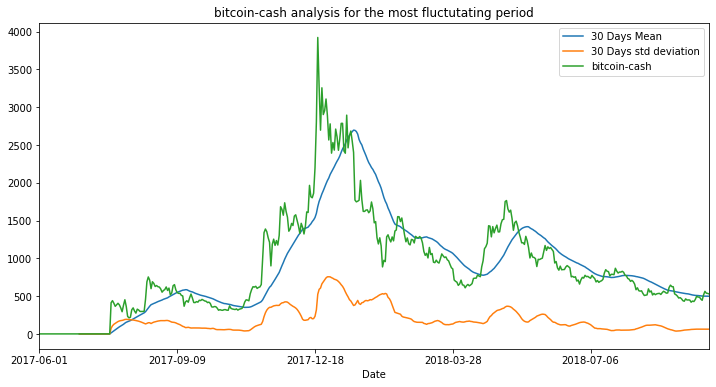

In [168]:
plt.figure(figsize=(12,6))
df_close.loc['2017-06-01':'2018-09-31']['bitcoin-cash'].rolling(window=30).mean().plot(label="30 Days Mean")
df_close.loc['2017-06-01':'2018-09-31']['bitcoin-cash'].rolling(window=30).std().plot(label="30 Days std deviation")
df_close.loc['2017-06-01':'2018-09-31']['bitcoin-cash'].plot(label='bitcoin-cash')
plt.legend()
plt.title('bitcoin-cash analysis for the most fluctutating period')

The ending of 2017 and the start of 2018 has been so fluctuatiing. The std deviation has spikes on a comparitively larger scale to order of hundreds even thousands. The mean has also not been stable and first rose and then moved back again.

Task#4: To examine the 30 days average of all currencies over the course of years from 2013 to 2019

In [167]:
df_close.rolling(window=30).mean().iplot(title='30 Days Moving Average of the 12 Currencies between 2013-2019')

Nearly all currency has their highest values in the start of 2018.

Now it is time to shrink our focus only to the top 3 currencies. We will pick the top 3 based on the maximum High and Close value of the currencies.

In [144]:
df.groupby('Currency')['Close'].max().sort_values(ascending=False).head(3)

Currency
bitcoin         19497.40
bitcoin-cash     3923.07
ethereum         1396.42
Name: Close, dtype: float64

In [145]:
df.groupby('Currency')['High'].max().sort_values(ascending=False).head(3)

Currency
bitcoin         20089.00
bitcoin-cash     4355.62
ethereum         1432.88
Name: High, dtype: float64

Turned out, bitcoin, bitcoin-cash, ethereum are the top 3 currency based on the high and closing values

#### Let us examine the market cap

In [166]:
df.groupby('Currency')['Market Cap'].last().sort_values(ascending=False).iplot(kind='bar',title='Top Currencies by Market Cap')

#### Let us examine the market cap

In [159]:
df.groupby('Currency')['Volume'].last()

Currency
binance-coin    0.0
bitcoin         0.0
bitcoin-cash    0.0
bitcoin-sv      0.0
cardano         0.0
eos             0.0
ethereum        0.0
litecoin        0.0
stellar         0.0
tether          0.0
tezos           0.0
xrp             0.0
Name: Volume, dtype: float64

Let us shrink our focus to only top 3 currencies in terms of market cap between the year 2016 and 2019


In [161]:
df_vol=df.pivot_table(values='Volume',index='Date',columns='Currency')

In [165]:
df_vol.loc['2016-01-01':][['bitcoin','bitcoin-cash','ethereum']].iplot(title='“Volume” by Currency between 2016 and 2019 for thetop 3 Currencies')
